In [64]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

In [65]:
# Construct dataset

# ==================================================

# Training Data
r1 = np.random.randint(0,10)
r2 = np.random.randint(0,10)

X1, y1 = make_gaussian_quantiles(cov=2., n_samples=200, n_features=2, n_classes=2, random_state=r1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=r2)

X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

# ==================================================

# Test Data
r3 = np.random.randint(0,10)
r4 = np.random.randint(0,10)

X3, y3 = make_gaussian_quantiles(cov=2., n_samples=200, n_features=2, n_classes=2, random_state=r3)
X4, y4 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=r4)

Xt = np.concatenate((X3, X4))
yt = np.concatenate((y3, - y4 + 1))

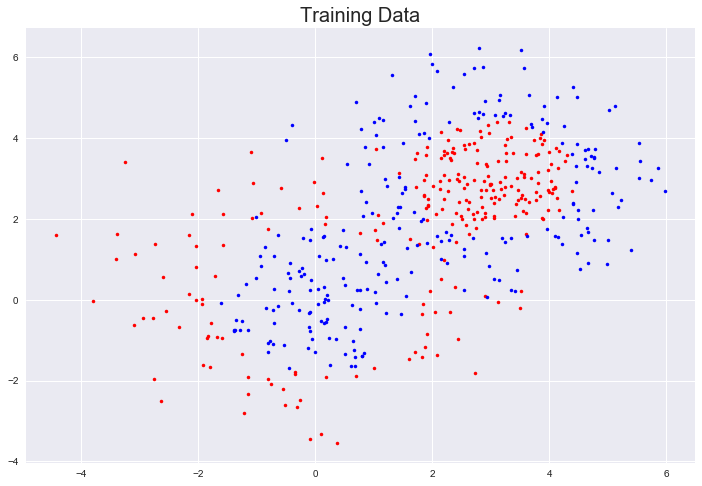

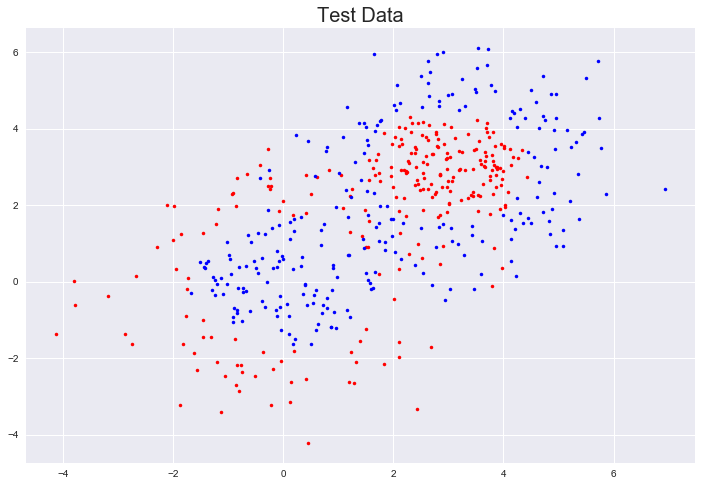

In [66]:
# Visualize the data (differentiated by label)

# Plot training data
Xr = X[y == 1]
Xb = X[y == 0]

plt.figure(figsize=[12,8])
plt.plot(Xr[:,0], Xr[:,1], 'r.')
plt.plot(Xb[:,0], Xb[:,1], 'b.')
plt.title('Training Data', fontsize=20)
plt.show()

# Plot test data
Xr = Xt[yt == 1]
Xb = Xt[yt == 0]

plt.figure(figsize=[12,8])
plt.plot(Xr[:,0], Xr[:,1], 'r.')
plt.plot(Xb[:,0], Xb[:,1], 'b.')
plt.title('Test Data', fontsize=20)
plt.show()

In [67]:
# Create and fit AdaBoosted decision tree models

thisModel = DecisionTreeClassifier(max_depth=4)

bdt_10 = AdaBoostClassifier(thisModel, algorithm="SAMME", n_estimators=10)
bdt_30 = AdaBoostClassifier(thisModel, algorithm="SAMME", n_estimators=30)
bdt_300 = AdaBoostClassifier(thisModel, algorithm="SAMME", n_estimators=300)
bdt_600 = AdaBoostClassifier(thisModel, algorithm="SAMME", n_estimators=600)

bdt_10.fit(X, y);
bdt_30.fit(X, y);
bdt_300.fit(X, y);
bdt_600.fit(X, y);

In [68]:
# Print the score for each model
print 'bdt_10 Accuracy:', bdt_10.score(Xt, yt)
print 'bdt_30 Accuracy:', bdt_30.score(Xt, yt)
print 'bdt_300 Accuracy:', bdt_300.score(Xt, yt)
print 'bdt_600 Accuracy:', bdt_600.score(Xt, yt)

bdt_10 Accuracy: 0.876
bdt_30 Accuracy: 0.88
bdt_300 Accuracy: 0.882
bdt_600 Accuracy: 0.886


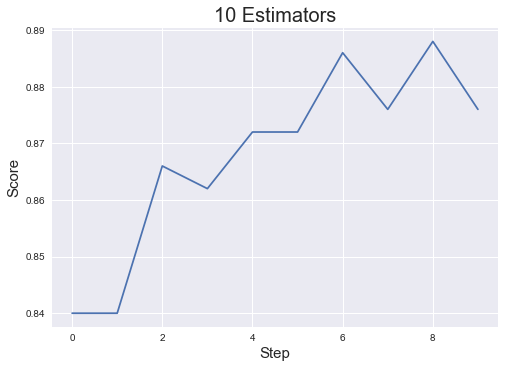

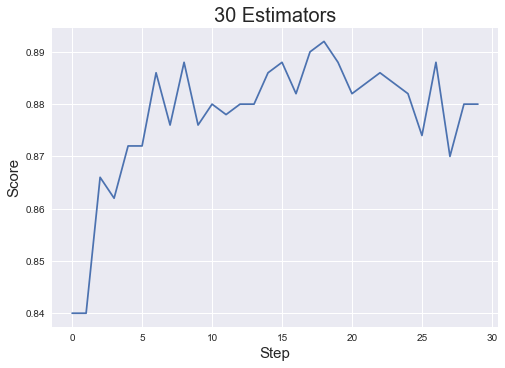

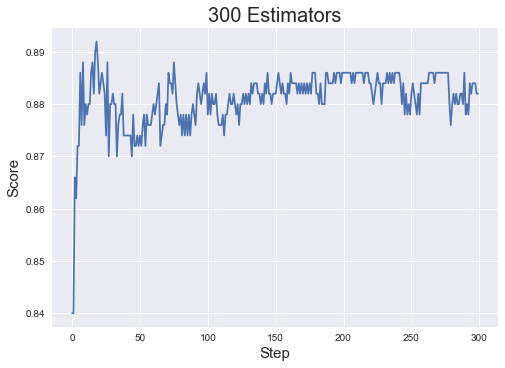

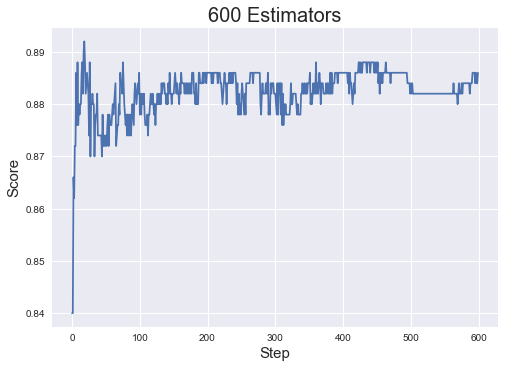

In [69]:
# Plot the staged-score for each model
for j in [bdt_10, bdt_30, bdt_300, bdt_600]:
    a = ([i for i in j.staged_score(Xt, yt)])
    tt = str(len(a)) + ' Estimators'
    plt.plot(a)
    plt.title(tt, fontsize = 20)
    plt.xlabel('Step', fontsize = 15)
    plt.ylabel('Score', fontsize = 15)
    plt.show()

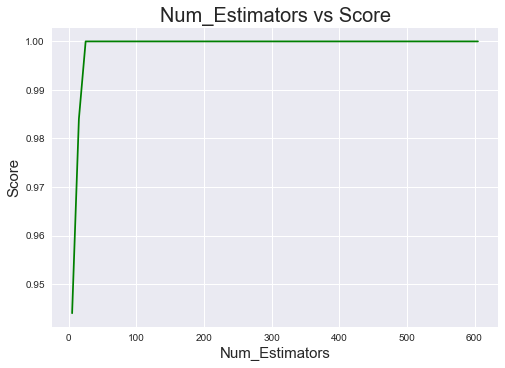

In [70]:
# This plot shows how the model scores/accuracy vary with number of estimators
scoreList = []
numEstimatorList = range(5,609,10)

for n in numEstimatorList:
    bdt = AdaBoostClassifier(thisModel, algorithm="SAMME", n_estimators=n)
    bdt.fit(X,y)
    scoreList.append(bdt.score(X,y))
    
plt.plot(numEstimatorList, scoreList, 'g')
plt.title('Num_Estimators vs Score', fontsize = 20)
plt.xlabel('Num_Estimators', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.show()

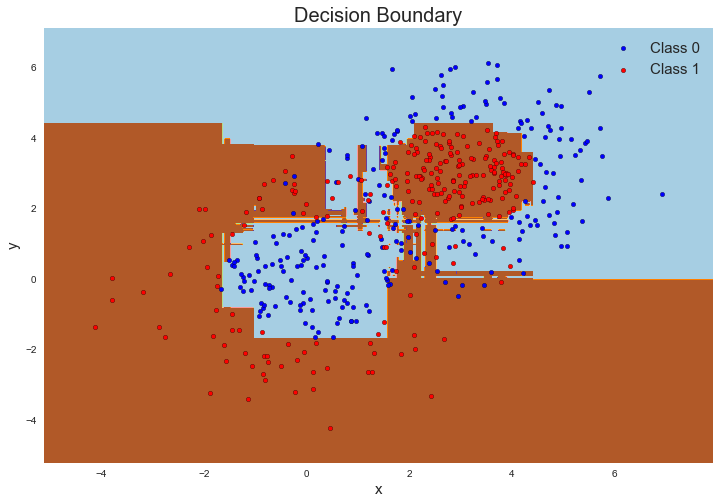

In [71]:
# Plot the decision boundary

plot_colors = ['b', 'r'] # colors for the two classes
plot_step = 0.02 # grid size
class_names = ['0', '1'] # names for the two classes

plt.figure(figsize=(12, 8))

# extents of the plot
x_min = Xt[:, 0].min() - 1
x_max = Xt[:, 0].max() + 1
y_min = Xt[:, 1].min() - 1
y_max = Xt[:, 1].max() + 1

# generate the coordinates of the grid points
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)) 

# unroll and concatenate the coordinates of the grid, predict on them, then reshape the results
Z = bdt_600.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# plot the contours
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# ===========================================================================

# Add the data points to the plot

for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(yt == i)
    plt.scatter(Xt[idx, 0], Xt[idx, 1], color=c, cmap=plt.cm.Paired, s=20, edgecolor='k', label='Class '+n)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc='upper right', fontsize = 15)
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title('Decision Boundary', fontsize = 20)
plt.show()